In [1]:
import pandas as pd
import seaborn as sns
from statsmodels.stats.multitest import multipletests
import numpy as np
import matplotlib.pyplot as plt
import anndata as ad
from scxmatch import test
import scanpy as sc
import matplotlib.gridspec as gridspec


will use the CPU to calculate the distance matrix.


In [2]:
stimuli = ['Ctrl', 'MCSF', 'TGFbeta', 'LPS', 'IFN10', 'YM201636']

In [3]:
data = pd.read_csv("../evaluation_results/4_miriam/single_cell_features.csv").drop(["Unnamed: 0"], axis=1)
adata = ad.AnnData(data.iloc[:, :-1], obs=pd.DataFrame(data["Label"]))
adata = adata[np.isin(adata.obs, stimuli)]

static_features = ["Mean area", "Mean perimeter", 'Mean soli.', 'Mean conv.', 'Mean circ.', 'Mean asp. ratio', 'Mean protr.', 'Mean angul.']
static_adata = ad.AnnData(data[static_features], obs=pd.DataFrame(data["Label"]))
static_adata = static_adata[np.isin(static_adata.obs, stimuli)]

#all_features = pd.read_csv("../evaluation_results/4_miriam/31D_All.csv").set_index("Unnamed: 0").loc[stimuli, stimuli]
#static_features = pd.read_csv("../evaluation_results/4_miriam/8D_PurelyStatic.csv").set_index("Unnamed: 0").loc[stimuli, stimuli]

/data/bionets/je30bery/anaconda3/envs/test_env/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/data/bionets/je30bery/anaconda3/envs/test_env/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [4]:
p_values = pd.DataFrame(np.zeros((len(stimuli), len(stimuli))), index=stimuli, columns=stimuli)
p_values_static = pd.DataFrame(np.zeros((len(stimuli), len(stimuli))), index=stimuli, columns=stimuli)

In [5]:
for i, stim1 in enumerate(stimuli):
    for j, stim2 in enumerate(stimuli):
        if j < i:
            p_values.loc[stim1, stim2], _, _ = test(adata, group_by="Label", reference=stim1, test_group=stim2, metric="seuclidean", rank=False, k=None)
            p_values_static.loc[stim1, stim2], _, _ = test(static_adata, group_by="Label", reference=stim1, test_group=stim2, metric="seuclidean", rank=False, k=None)

XMatch_group
test         124
reference     57
Name: count, dtype: int64
using CPU to calculate distance matrix.
creating distance graph with 182 samples
counting cross matches.
XMatch_group
test         124
reference     57
Name: count, dtype: int64
using CPU to calculate distance matrix.
creating distance graph with 182 samples
counting cross matches.
XMatch_group
test         124
reference     53
Name: count, dtype: int64
using CPU to calculate distance matrix.
creating distance graph with 178 samples
counting cross matches.
XMatch_group
test         124
reference     53
Name: count, dtype: int64
using CPU to calculate distance matrix.
creating distance graph with 178 samples
counting cross matches.
XMatch_group
test         57
reference    53
Name: count, dtype: int64
using CPU to calculate distance matrix.
creating distance graph with 110 samples
counting cross matches.
XMatch_group
test         57
reference    53
Name: count, dtype: int64
using CPU to calculate distance matrix.
c

/data/bionets/je30bery/anaconda3/envs/test_env/lib/python3.13/site-packages/scxmatch/core.py:104: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")
/data/bionets/je30bery/anaconda3/envs/test_env/lib/python3.13/site-packages/scxmatch/core.py:104: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")
/data/bionets/je30bery/anaconda3/envs/test_env/lib/python3.13/site-packages/scxmatch/core.py:104: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")
/data/bionets/je30bery/anaconda3/envs/test_env/lib/python3.13/site-packages/scxmatch/core.py:104: ImplicitMod

counting cross matches.
XMatch_group
test         53
reference    45
Name: count, dtype: int64
using CPU to calculate distance matrix.
creating distance graph with 98 samples
counting cross matches.
XMatch_group
test         53
reference    45
Name: count, dtype: int64
using CPU to calculate distance matrix.
creating distance graph with 98 samples
counting cross matches.
XMatch_group
reference    45
test         32
Name: count, dtype: int64
using CPU to calculate distance matrix.
creating distance graph with 78 samples
counting cross matches.
XMatch_group
reference    45
test         32
Name: count, dtype: int64
using CPU to calculate distance matrix.
creating distance graph with 78 samples
counting cross matches.
XMatch_group
test         124
reference     29
Name: count, dtype: int64
using CPU to calculate distance matrix.
creating distance graph with 154 samples
counting cross matches.
XMatch_group
test         124
reference     29
Name: count, dtype: int64
using CPU to calculate di

/data/bionets/je30bery/anaconda3/envs/test_env/lib/python3.13/site-packages/scxmatch/core.py:104: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["XMatch_group"] = np.where(adata.obs[group_by].isin(test_group), "test", "reference")


In [6]:
p_values_static

,Ctrl,MCSF,TGFbeta,LPS,IFN10,YM201636
Ctrl,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0
MCSF,0.103910,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0
TGFbeta,0.002452,1.567590e-01,0.000000,0.000000e+00,0.000000,0.0
LPS,0.000266,5.138757e-07,0.000005,0.000000e+00,0.000000,0.0
IFN10,0.188180,1.661927e-01,0.006151,6.156933e-07,0.000000,0.0
YM201636,0.022242,3.142372e-02,0.008349,6.295297e-07,0.002913,0.0


In [7]:
p_values.values[np.where(p_values.values > 0)] = multipletests(p_values.values[np.where(p_values.values > 0)], method="fdr_bh")[1]

In [8]:
p_values_static.values[np.where(p_values_static.values > 0)] = multipletests(p_values_static.values[np.where(p_values_static.values > 0)], method="fdr_bh")[1]

In [9]:
all_features = p_values + p_values_static.T

In [10]:
mask = np.eye(len(all_features.values))

In [11]:
sc.pp.neighbors(adata)
sc.pp.neighbors(static_adata)
sc.tl.umap(adata)
sc.tl.umap(static_adata)

/data/bionets/je30bery/anaconda3/envs/test_env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
scatter_df = pd.DataFrame(adata.obsm["X_umap"], columns=["UMAP 1 all features", "UMAP 2 all features"])
scatter_df[["UMAP 1 static features", "UMAP 2 static features"]] = static_adata.obsm["X_umap"]
scatter_df["Group"] = adata.obs["Label"].values
scatter_df = scatter_df[scatter_df["Group"].isin(["Ctrl", "MCSF"])]

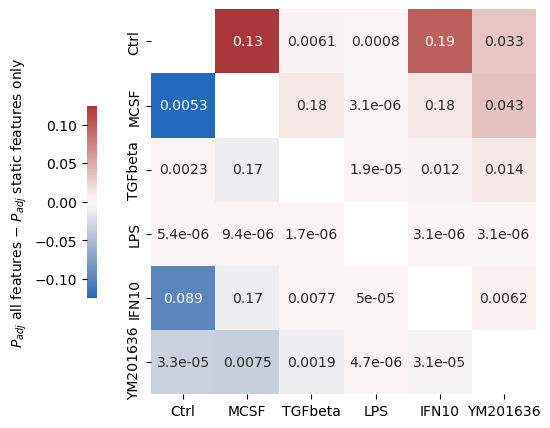

In [26]:
f = plt.figure(figsize=(7, 5))
sns.heatmap(
    (all_features - all_features.T),
    annot=all_features,
    mask=mask,
    cmap=sns.color_palette("vlag", as_cmap=True),
    square=True,
    cbar_kws={'label': "$P_{adj}$ all features $-~P_{adj}$ static features only", 'orientation': 'vertical', "location": "left", "shrink": 0.5},
)
plt.savefig("../plots/fig5/heatmap.svg", bbox_inches="tight")

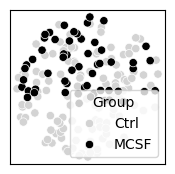

In [28]:
f = plt.figure(figsize=(2, 2))
sns.scatterplot(scatter_df, hue="Group", x="UMAP 1 all features", y="UMAP 2 all features", palette=["lightgrey", "black"])
plt.xlabel(None)
plt.ylabel(None)
plt.xticks([])
plt.yticks([])
plt.savefig("../plots/fig5/all_features_umap.svg")

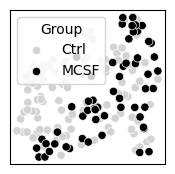

In [27]:
f = plt.figure(figsize=(2, 2))
sns.scatterplot(scatter_df, hue="Group", x="UMAP 1 static features", y="UMAP 2 static features", palette=["lightgrey", "black"])
plt.xlabel(None)
plt.ylabel(None)
plt.xticks([])
plt.yticks([])
plt.savefig("../plots/fig5/static_features_umap.svg")